# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
merge_df
# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [91]:
# Checking the number of mice.
mice_count = merge_df["Mouse ID"].nunique()
print("Total mice: {}".format(mice_count))


Total mice: 249


In [99]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mouse = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse

array(['g989'], dtype=object)

In [141]:
# Optional: Get all the data for the duplicate mouse ID.
duplicated_row_series = merge_df["Mouse ID"].isin(duplicate_mouse)
duplicate_rows = merge_df.loc[duplicated_row_series]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [181]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = merge_df.loc[~duplicated_row_series]
clean_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [183]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_mouse_df["Mouse ID"].nunique()
print("Total Mouse: {}".format(clean_mice_count))

Total Mouse: 248


## Summary Statistics

In [185]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summarystat_df = clean_mouse_df.groupby(['Drug Regimen'])

summarystat_mean = summarystat_df['Tumor Volume (mm3)'].mean()
summarystat_median = summarystat_df['Tumor Volume (mm3)'].median()
summarystat_variance = summarystat_df['Tumor Volume (mm3)'].var()
summarystat_std = summarystat_df['Tumor Volume (mm3)'].std()
summarystat_sem = summarystat_df['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({
    "Mean Tumor Volume": summarystat_mean,
    "Median Tumor Volume": summarystat_median,
    "Variance Tumor Volume": summarystat_variance,
    "Standard Dev Tumor Volume": summarystat_std,
    "SEM Tumor Volume (mm3)": summarystat_sem
})

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Dev Tumor Volume,SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [187]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summarystat_agg_df = clean_mouse_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
# Using the aggregation method, produce the same summary statistics in a single line
summarystat_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

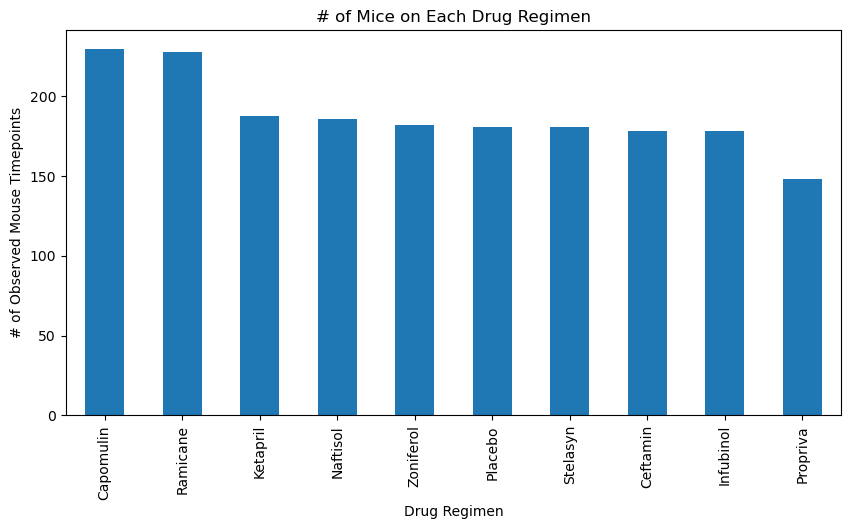

In [201]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_counts = clean_mouse_df.groupby('Drug Regimen')['Timepoint'].count()
sorted_timepoints = timepoint_counts.sort_values(ascending=False)

sorted_timepoints.plot.bar(
    figsize=(10, 5),
    title="# of Mice on Each Drug Regimen",
    fontsize=10
)

plt.ylabel("# of Observed Mouse Timepoints", fontsize=10)
plt.xlabel("Drug Regimen", fontsize=10)

plt.show()

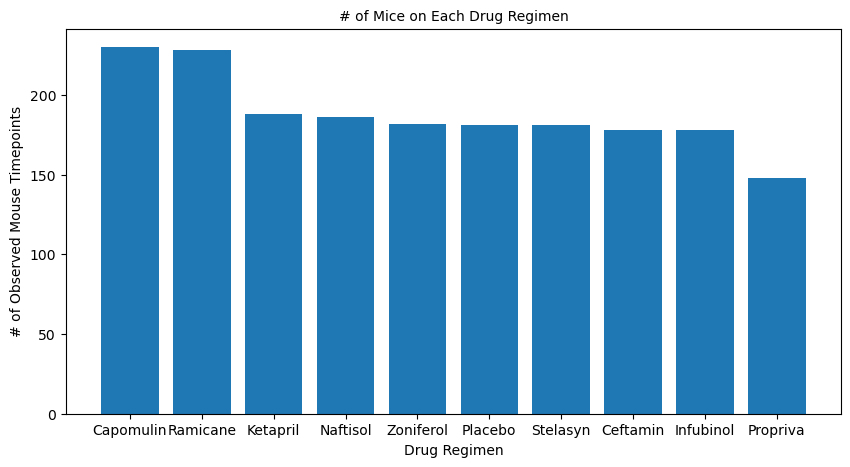

In [209]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint_counts = clean_mouse_df.groupby('Drug Regimen')['Timepoint'].count()
sorted_timepoints = timepoint_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(sorted_timepoints.index, sorted_timepoints.values)
plt.title("# of Mice on Each Drug Regimen", fontsize=10)
plt.xlabel("Drug Regimen", fontsize=10)
plt.ylabel("# of Observed Mouse Timepoints", fontsize=10)
plt.show()


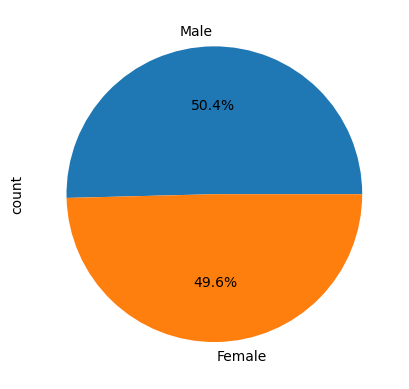

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


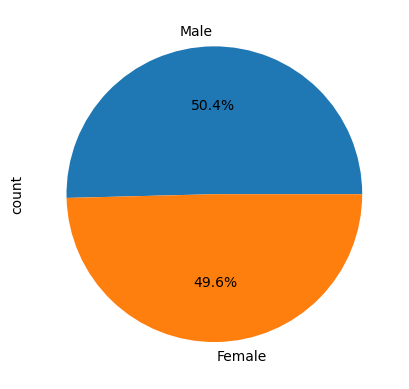

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [227]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_max = clean_mouse_df.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].max().reset_index()
timepoint_max

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_merge_df = pd.merge(timepoint_max, clean_mouse_df, on=['Drug Regimen', 'Mouse ID', 'Timepoint'], how='left')
treatment_rg = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
regimens_df = timepoint_merge_df[timepoint_merge_df['Drug Regimen'].isin(treatment_rg)]
regimens_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
194,Ramicane,s508,45,30.276232,0,Male,1,17
195,Ramicane,u196,45,40.667713,3,Male,18,25
196,Ramicane,w678,5,43.166373,0,Female,5,24
197,Ramicane,y449,15,44.183451,0,Male,19,24


In [239]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_df = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
    volume_df = regimens_df.loc[regimens_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_vol_df.append(volume_df)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = volume_df.quantile([0.25, 0.5, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]

    lower_bound = quartiles[0.25] - (1.5 * iqr)
    upper_bound = quartiles[0.75] + (1.5 * iqr)

    # Determine outliers using upper and lower bounds
    outliers = volume_df.loc[(volume_df > upper_bound) | (volume_df < lower_bound)]
   
    print(f"Drug Regimen: {drug}")
    print(f"Outliers:\n{outliers}\n")

Drug Regimen: Capomulin
Outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Drug Regimen: Ramicane
Outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Drug Regimen: Infubinol
Outliers:
55    36.321346
Name: Tumor Volume (mm3), dtype: float64

Drug Regimen: Ceftamin
Outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)



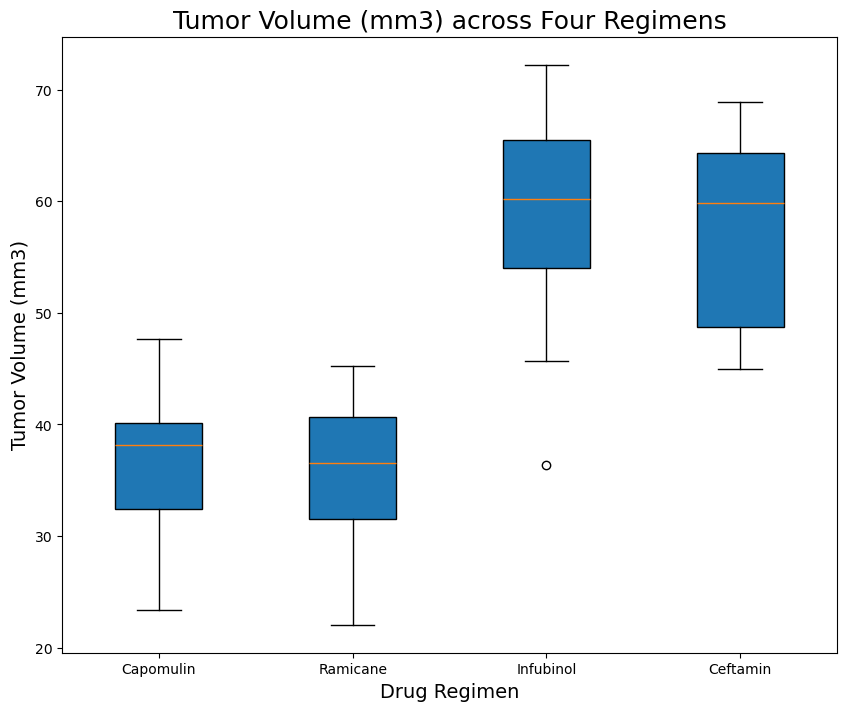

In [243]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1, ax1 = plt.subplots(figsize=(10, 8))

ax1.boxplot(tumor_vol_df, patch_artist=True)
ax1.set_title("Tumor Volume (mm3) across Four Regimens", fontsize=18)
ax1.set_xlabel("Drug Regimen", fontsize=14)
ax1.set_ylabel("Tumor Volume (mm3)", fontsize=14)
ax1.set_xticks(range(1, len(treatment) + 1))
ax1.set_xticklabels(treatment)

plt.show()

## Line and Scatter Plots

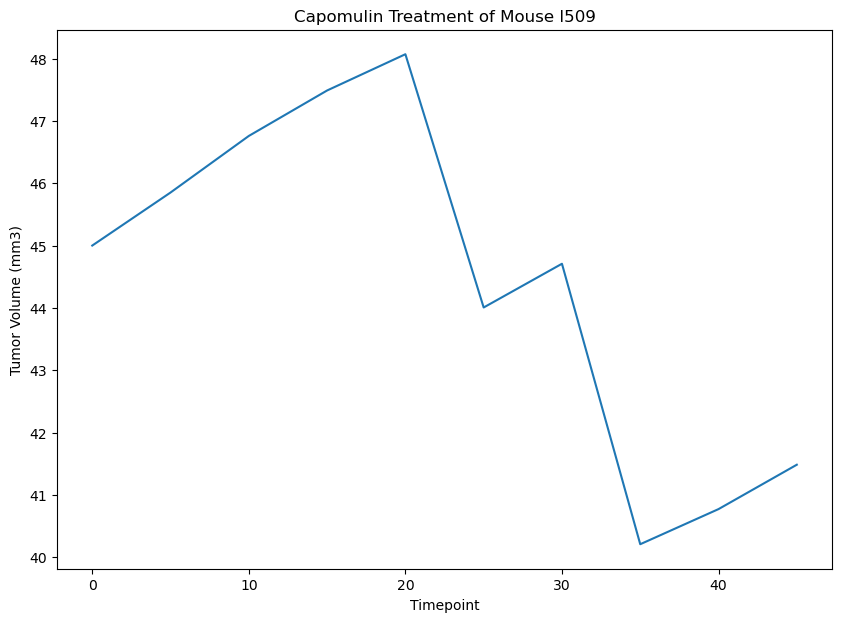

In [253]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = clean_df[clean_df["Mouse ID"] == "l509"]
time = line_df["Timepoint"]
vol = line_df["Tumor Volume (mm3)"]

plt.figure(figsize=(10, 7))
plt.plot(time, vol)

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

plt.show()

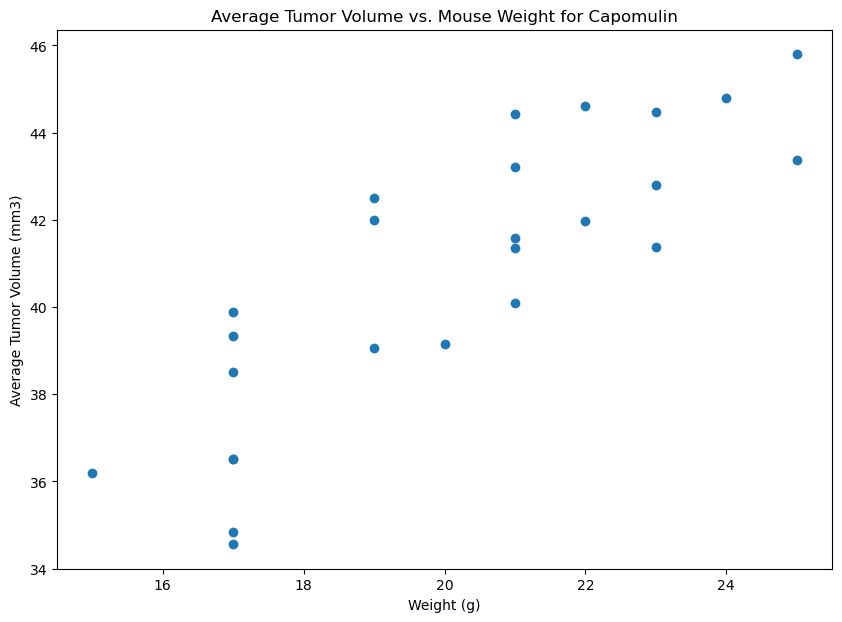

In [272]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_df = clean_mouse_df[clean_mouse_df["Drug Regimen"] == "Capomulin"]

plt.figure(figsize=(10, 7))
plt.scatter(
    scatter_df.groupby('Mouse ID')['Weight (g)'].mean(),
    scatter_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin')

plt.show()

## Correlation and Regression

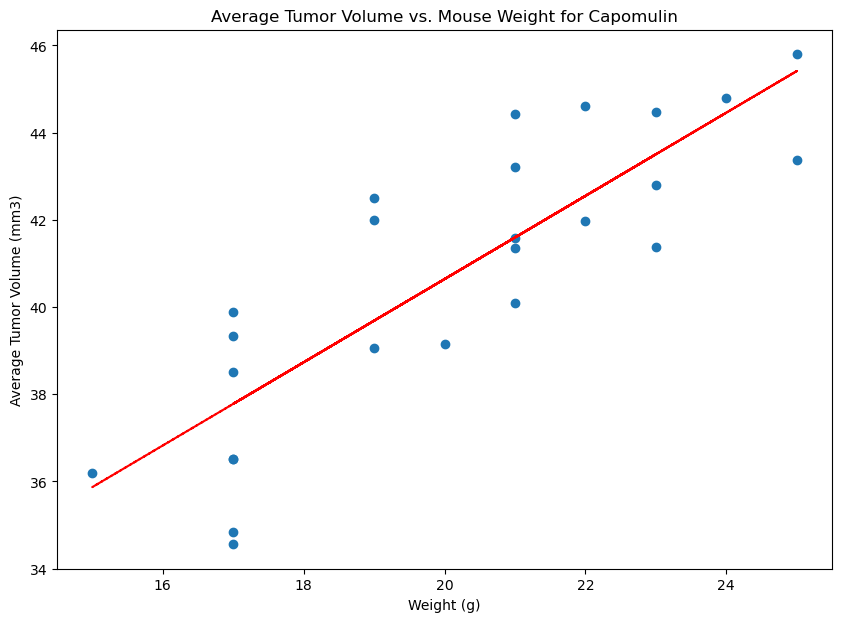

The correlation between mouse weight and the average tumor volume is: 0.84


In [297]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import numpy as np
from scipy import stats
scatter_df = clean_mouse_df[clean_mouse_df["Drug Regimen"] == "Capomulin"]

avg_weight = scatter_df.groupby('Mouse ID')['Weight (g)'].mean()
avg_tumor_volume = scatter_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

correlation_coefficient = np.corrcoef(avg_weight, avg_tumor_volume)[0, 1]

slope, intercept, r_value, p_value, std_err = stats.linregress(avg_weight, avg_tumor_volume)

plt.figure(figsize=(10, 7))
plt.scatter(avg_weight, avg_tumor_volume)
plt.plot(avg_weight, intercept + slope * avg_weight, color='r', linestyle='--')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin')
plt.show()
print(f"The correlation between mouse weight and the average tumor volume is: {correlation_coefficient:.2f}")